# imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

writer = pd.ExcelWriter('./results/data_of_all.xlsx', engine='xlsxwriter')

# config

In [2]:
config_prefix = ['TI', 'TR', 'BR', 'BI']

config_datasheet = r'./results/preprocessed.xlsx'

# import df

In [3]:
df_raw = pd.read_excel(config_datasheet)
df_raw = df_raw[df_raw["Outlier"] == False]
df_raw = df_raw[df_raw["correctness"] == True]
df_raw["answer"] = df_raw["answer"].astype(str)
df_raw

,case,factor,algorithm,answer,idk,time,correctness,Run Out Of Time,Outlier
1,211,TI,BinarySearch,3,False,58,True,False,False
2,224,TI,BinarySearch,3,False,30,True,False,False
3,231,TI,BinarySearch,3,False,85,True,False,False
4,232,TI,BinarySearch,3,False,5,True,False,False
6,240,TI,BinarySearch,3,False,84,True,False,False
...,...,...,...,...,...,...,...,...,...
146,209,TR,ReverseString,gnikcarT eyE,False,111,True,False,False
149,236,TR,ReverseString,"""gnikcarT eyE""",False,40,True,False,False
153,210,BI,ReverseString,gnikcarTeyE,False,72,True,False,False
154,212,BI,ReverseString,gnikcarTeyE,False,60,True,False,False


# Response Time

In [4]:
df_total = df_raw.copy()
df_total["algorithm"] = "Total"
df_sub = pd.concat([df_raw, df_total])
df_result = df_sub[["case", "factor", "algorithm", "time"]].copy()

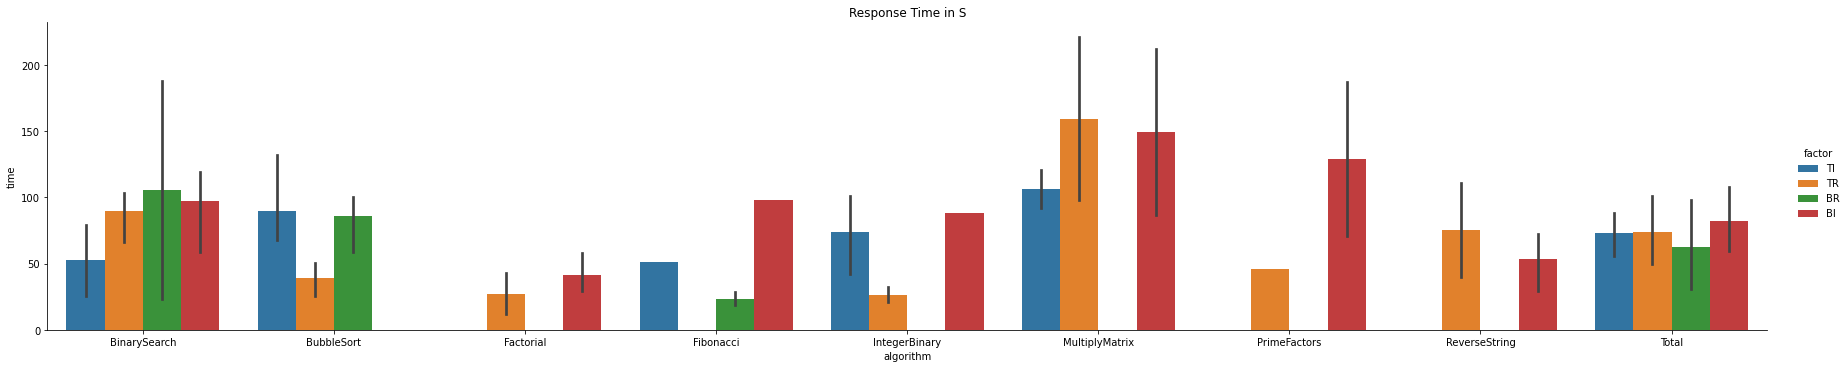

In [5]:
ax = sns.catplot(x="algorithm", y="time", hue="factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Response Time in S")
plt.show()
plt.close('all')

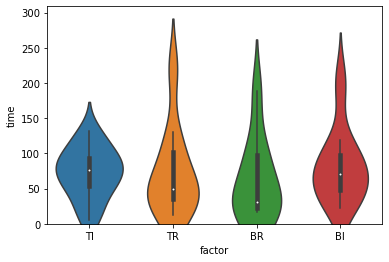

In [6]:
df_tmp = df_result[df_result["algorithm"] != "Total"]
sns.violinplot(x="factor", y="time", data=df_tmp)
plt.ylim(0,)
plt.show()